# Load modules

In [1]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import halo_data as hd

# Load data

In [2]:
data = hd.getdata("C:/Users/LV/OneDrive - University of Helsinki/FMI/halo/53/depolarization/")
# data = hd.getdata("G:/OneDrive - University of Helsinki/FMI/halo/53/depolarization/")
# data = hd.getdata(r'G:\OneDrive - University of Helsinki\FMI\halo\53\depolarization')

Rerun start from this cell to get new data file

In [3]:
file_name = next(data)
df = hd.halo_data(file_name)

# Data exploration

In [4]:
# Info of data
df.info

{'num_pulses_m1': 105000.0,
 'num_pulses_averaged': 1050000.0,
 'num_lags': 0.0,
 'num_samples_gate': 10.0,
 'lens_diameter': 0.05999999865889549,
 'divergence': 3.300000025774352e-05,
 'focus': 2000.0,
 'energy': 9.999999747378752e-06,
 'wavelength': 1.500000053056283e-06,
 'prf': 15000.0,
 'pulse_length': 2.0000000233721948e-07,
 'bandwidth': 50000000.0,
 'latitude': 62.737998962402344,
 'longitude': 27.542999267578125,
 'altitude': 190.0,
 'elevation': 89.94999694824219,
 'azimuth': 90.0}

In [5]:
# Data
df.data

{'range': array([  15.,   45.,   75.,  105.,  135.,  165.,  195.,  225.,  255.,
         285.,  315.,  345.,  375.,  405.,  435.,  465.,  495.,  525.,
         555.,  585.,  615.,  645.,  675.,  705.,  735.,  765.,  795.,
         825.,  855.,  885.,  915.,  945.,  975., 1005., 1035., 1065.,
        1095., 1125., 1155., 1185., 1215., 1245., 1275., 1305., 1335.,
        1365., 1395., 1425., 1455., 1485., 1515., 1545., 1575., 1605.,
        1635., 1665., 1695., 1725., 1755., 1785., 1815., 1845., 1875.,
        1905., 1935., 1965., 1995., 2025., 2055., 2085., 2115., 2145.,
        2175., 2205., 2235., 2265., 2295., 2325., 2355., 2385., 2415.,
        2445., 2475., 2505., 2535., 2565., 2595., 2625., 2655., 2685.,
        2715., 2745., 2775., 2805., 2835., 2865., 2895., 2925., 2955.,
        2985., 3015., 3045., 3075., 3105., 3135., 3165., 3195., 3225.,
        3255., 3285., 3315., 3345., 3375., 3405., 3435., 3465., 3495.,
        3525., 3555., 3585., 3615., 3645., 3675., 3705., 3735., 3765

In [6]:
# Names of data
df.data_names

['range',
 'time',
 'time_averaged',
 'beta_raw',
 'v_raw',
 'v_error',
 'co_signal',
 'cross_signal',
 'depo_raw',
 'co_signal_averaged',
 'cross_signal_averaged',
 'depo_averaged_raw']

In [7]:
# Overview of data
df.describe()

,beta_raw,v_raw,v_error,co_signal,cross_signal,depo_raw,co_signal_averaged,cross_signal_averaged,depo_averaged_raw
count,1.705e+06,1.705e+06,1.705e+06,1.705e+06,1.705e+06,1.705e+06,1.5296e+05,1.5296e+05,1.5296e+05
mean,1.0249e-06,-0.36737,-503.71,1.0764,-15.701,-16.27,-8.3017,-8.3717,-9.3667
std,1.1952e-05,4.0769,499.81,0.90284,128.16,634.22,96.381,96.37,185.65
min,-1.0537e-05,-20.169,-999,0.9002,-999,-1.5285e+05,-999,-999,-28074
25%,-2.9164e-07,-2.0524,-999,0.99915,0.99906,-1.0038,0.99974,0.99974,-0.95606
50%,1.3682e-08,-0.4471,-999,1.0001,1,0.016702,1,1,0.029561
75%,4.2183e-07,1.3875,0.67884,1.0011,1.001,0.89633,1.0003,1.0003,0.91308
95%,2.4815e-06,6.8912,1.0535,1.0036,1.0028,5.896,1.0011,1.0008,5.8416
max,0.00036433,18.931,1.1819,27.626,5.0575,7.3152e+05,23.912,3.9126,25906
Missing values,0,0,0,0,0,0,0,0,0


# Filter data

Filter data variables based on co_signal with a threshold

In [8]:
df.filter(variables=['beta_raw', 'v_raw', 'cross_signal', 'depo_raw'],
          ref='co_signal', threshold=np.percentile(df.data['co_signal'], 99))

Filter data variables based on co_signal_averaged with a threshold

In [9]:
df.filter(variables=['cross_signal_averaged', 'depo_averaged_raw'],
          ref='co_signal_averaged', threshold=np.percentile(df.data['co_signal_averaged'], 99))

Overview of data after filtering

In [10]:
# Overview of data
df.describe()

,beta_raw,v_raw,v_error,co_signal,cross_signal,depo_raw,co_signal_averaged,cross_signal_averaged,depo_averaged_raw
count,17050,17050,1.705e+06,1.705e+06,17050,17050,1.5296e+05,1530,1530
mean,9.451e-05,-0.42107,-503.71,1.0764,-15.059,-16.303,-8.3017,1.3017,0.043466
std,7.2544e-05,0.46744,499.81,0.90284,126.91,126.75,96.381,0.31441,0.024741
min,1.5183e-05,-2.7403,-999,0.9002,-999,-999,-999,1.0098,0.0049389
25%,3.2023e-05,-0.6382,-999,0.99915,1.0813,0.024334,0.99974,1.0837,0.028354
50%,7.0657e-05,-0.4089,-999,1.0001,1.1843,0.038971,1,1.1915,0.041584
75%,0.00014619,-0.1796,0.67884,1.0011,1.4136,0.055356,1.0003,1.4151,0.052716
95%,0.00023617,0.3555,1.0535,1.0036,1.9467,0.096274,1.0011,1.9026,0.08087
max,0.00036433,2.0372,1.1819,27.626,5.0575,0.56875,23.912,3.9126,0.37879
Missing values,1.6879e+06,1.6879e+06,0,0,1.6879e+06,1.6879e+06,0,1.5143e+05,1.5143e+05


# Plot data

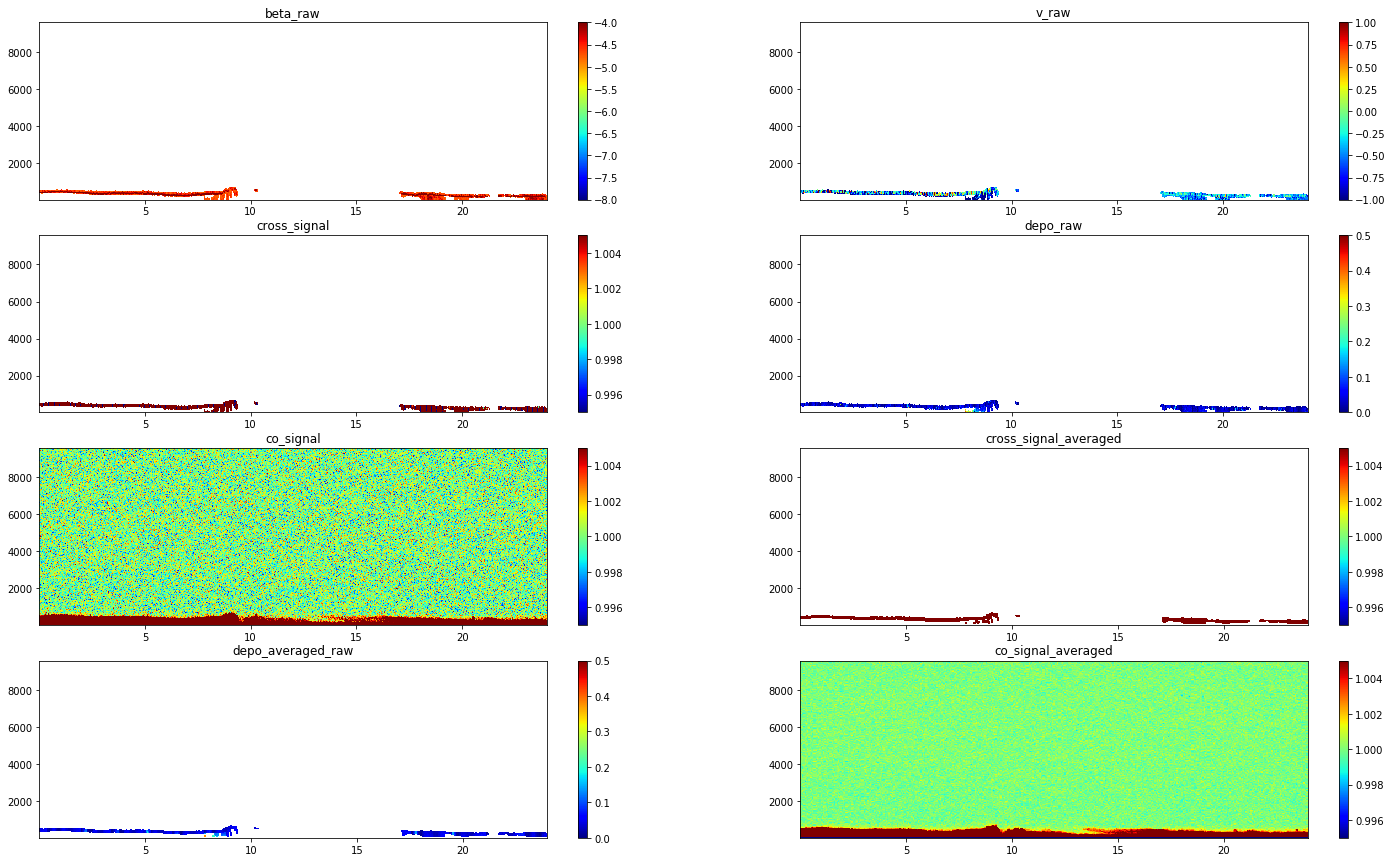

In [11]:
# Plot data
df.plot(
    variables=['beta_raw', 'v_raw', 'cross_signal', 'depo_raw', 'co_signal',
               'cross_signal_averaged', 'depo_averaged_raw', 'co_signal_averaged'],
    ncol=2, size=(25, 15))